In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path = Path('../dataset/')
data = ImageDataBunch.from_folder(path=path, valid_pct=0.2,ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

['deer', 'gazelle']


(2, 2)

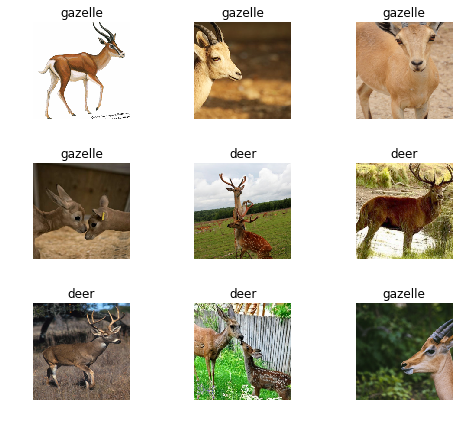

In [6]:
data.show_batch(rows=3, figsize=(7,6))
print(data.classes)
len(data.classes),data.c

In [7]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.917690,0.579868,0.307692,00:06
1,0.687560,0.317168,0.102564,00:03
2,0.542525,0.224303,0.076923,00:03
3,0.442700,0.171758,0.051282,00:03


In [22]:
learn.export('../model/model.pkl')

(Category gazelle, tensor([0.0160, 0.9840]))

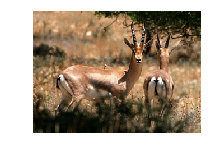

In [25]:
path = Path()
img = open_image('/home/jupyter/beast_model/example.jpg')
img.show()

In [33]:
learn2 = load_learner('../model/', 'model.pkl')

In [34]:
pred_class,pred_idx,outputs = learn2.predict(img)
pred_class,outputs

(Category gazelle, tensor([0.0160, 0.9840]))

[PosixPath('../model'), PosixPath('../nbs'), PosixPath('../dataset')]